In [9]:
# Import libraries
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [10]:
dataset = pd.read_csv('result_merged.csv', header = None, error_bad_lines=False)

b'Skipping line 25: expected 238 fields, saw 1806\nSkipping line 58: expected 238 fields, saw 326\nSkipping line 59: expected 238 fields, saw 330\nSkipping line 61: expected 238 fields, saw 282\nSkipping line 62: expected 238 fields, saw 326\nSkipping line 63: expected 238 fields, saw 290\nSkipping line 64: expected 238 fields, saw 322\nSkipping line 107: expected 238 fields, saw 358\nSkipping line 130: expected 238 fields, saw 374\nSkipping line 136: expected 238 fields, saw 2382\nSkipping line 142: expected 238 fields, saw 302\nSkipping line 148: expected 238 fields, saw 274\nSkipping line 201: expected 238 fields, saw 322\nSkipping line 258: expected 238 fields, saw 258\nSkipping line 290: expected 238 fields, saw 266\nSkipping line 302: expected 238 fields, saw 254\nSkipping line 304: expected 238 fields, saw 282\nSkipping line 412: expected 238 fields, saw 310\nSkipping line 424: expected 238 fields, saw 254\nSkipping line 426: expected 238 fields, saw 294\nSkipping line 428: expe

In [15]:
dataset2 = pd.read_excel('result_merged_finalPCA.xlsm', header = None)

In [16]:
dataset2.head()

,0,1,2,3,4,5,6,7,8,9,...,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430
0,VT,2008-28529,CRC,ECE1,c.4-11896G>A,NaN,51.5,KRAS,c.35G>A,p.(Gly12Asp),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VT,1512-11831,NSCLC,CLIC4,c.762+696G>C,NaN,56.9,ZNF573,c.1824+15C>T,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VT,1611-06364,NSCLC,PTEN,c.968dupA,p.(Asn323Lysfs*2),49.3,ZNF573,c.1998+15C>T,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,2008-19496,CLL,CALR,c.1193A>G,p.(Glu398Gly),13.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VT,1803-28674,EQC,BCAS2,c.678+68T>G,NaN,49.6,ECE1,c.4-11896G>A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Fourth Principal Component')

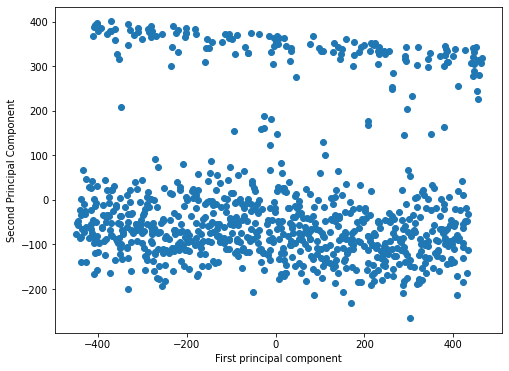

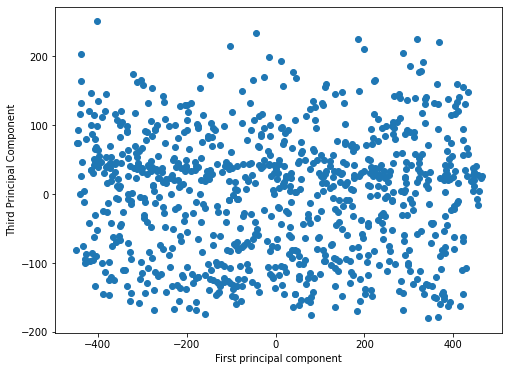

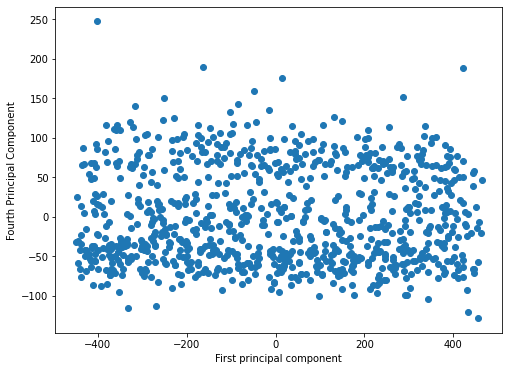

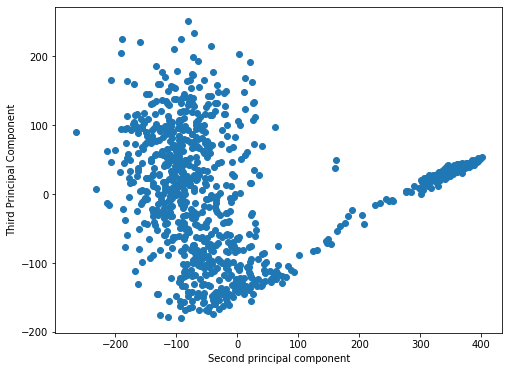

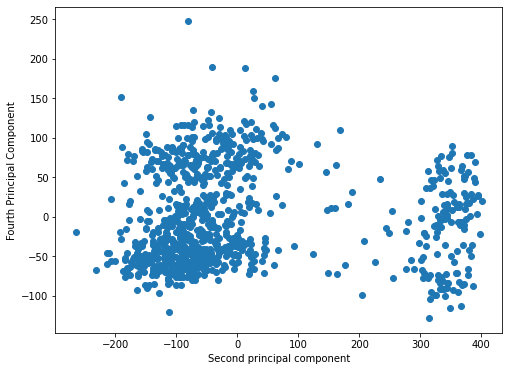

In [11]:
# Encode text in categorical data
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ord_enc = OrdinalEncoder()
column_names = list(dataset.columns.values)

        
for column in column_names:        
    if dataset[column].dtype != float:
        dataset[column] = dataset[column].fillna('zero')
        dataset[column] = ord_enc.fit_transform(dataset[[column]])
    else:
        dataset[column] = dataset[column].fillna(0)
        pass
    

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(dataset)
x_pca = pca.transform(dataset)


# Reduction of 13 dimensions in just 2
x_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,3], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Fourth Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2], cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,3], cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Fourth Principal Component')

In [1]:
# Encode text in categorical data
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ord_enc = OrdinalEncoder()
column_names = list(dataset2.columns.values)

        
for column in column_names:        
    if dataset2[column].dtype != float:
        dataset2[column] = dataset2[column].fillna('zero')
        dataset2[column] = ord_enc.fit_transform(dataset[[column]])
    else:
        dataset2[column] = dataset2[column].fillna(0)
        pass
    

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(dataset2)
x_pca = pca.transform(dataset2)


# Reduction of 13 dimensions in just 2
x_pca.shape
label = 2
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap='plasma', c=dataset2[label])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2], cmap='plasma', c=dataset2[label])
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,3], cmap='plasma', c=dataset2[label])
plt.xlabel('First principal component')
plt.ylabel('Fourth Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2], cmap='plasma', c=dataset2[label])
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,3], cmap='plasma', c=dataset2[label])
plt.xlabel('Second principal component')
plt.ylabel('Fourth Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,4], cmap='plasma', c=dataset2[label])
plt.xlabel('Second principal component')
plt.ylabel('Fifth Principal Component')

NameError: name 'dataset2' is not defined

In [12]:
dataset.to_excel("output.xlsx")